很多机器学习的问题都会涉及到有着几千甚至数百万维的特征的训练实例。这不仅让训练过程变**得非常缓慢，同时还很难找到一个很好的解，我们接下来就会遇到这种情况。这种问题通常被称为**维数灾难（curse of dimentionality）。<br>
幸运的是，在现实生活中我们经常可以极大的降低特征维度，将一个十分棘手的问题转变成一个可以较为容易解决的问题。例如，对于 MNIST 图片集（第 3 章中提到）：图片四周边缘部分的像素几乎总是白的，因此你完全可以将这些像素从你的训练集中扔掉而不会丢失太多信息。图 7-6 向我们证实了这些像素的确对我们的分类任务是完全不重要的。同时，两个相邻的像素往往是高度相关的：如果你想要将他们合并成一个像素（比如取这两个像素点的平均值）你并不会丢失很多信息。<br>

警告：降维肯定会丢失一些信息（这就好比将一个图片压缩成 JPEG 的格式会降低图像的质量），因此即使这种方法可以加快训练的速度，同时也会让你的系统表现的稍微差一点。降维会让你的工作流水线更复杂因而更难维护。所有你应该先尝试使用原始的数据来训练，如果训练速度太慢的话再考虑使用降维。在某些情况下，降低训练集数据的维度可能会筛选掉一些噪音和不必要的细节，这可能会让你的结果比降维之前更好（这种情况通常不会发生；它只会加快你训练的速度）。<br>

降维除了可以加快训练速度外，在数据可视化方面（或者 DataViz）也十分有用。降低特征维度到 2（或者 3）维从而可以在图中画出一个高维度的训练集，让我们可以通过视觉直观的发现一些非常重要的信息，比如聚类。<br>

在这一章里，我们将会讨论维数灾难问题并且了解在高维空间的数据。然后，我们将会展示两种主要的降维方法：**投影（projection）**和**流形学习（Manifold Learning）**，同时我们还会介绍三种流行的降维技术：**主成分分析（PCA）**，**核主成分分析（Kernel PCA）**和**局部线性嵌入（LLE）**。
。

## 维数灾难
**训练集的维度越高，过拟合的风险就越大**
理论上来说，维数爆炸的一个解决方案是增加训练集的大小从而达到拥有足够密度的训练集。不幸的是，在实践中，达到给定密度所需的训练实例的数量随着维度的数量呈指数增长。如果只有 100 个特征（比 MNIST 问题要少得多）并且假设它们均匀分布在所有维度上，那么如果想要各个临近的训练实例之间的距离在 0.1 以内，您需要比宇宙中的原子还要多的训练实例。

## 降维的主要方法
### 投影（Projection）
在大多数现实生活的问题中，训练实例并不是在所有维度上均匀分布的。许多特征几乎是常数，而其他特征则高度相关（如前面讨论的 MNIST）。结果，所有训练实例实际上位于（或接近）高维空间的低维子空间内。
但是，投影并不总是降维的最佳方法。在很多情况下，子空间可能会扭曲和转动，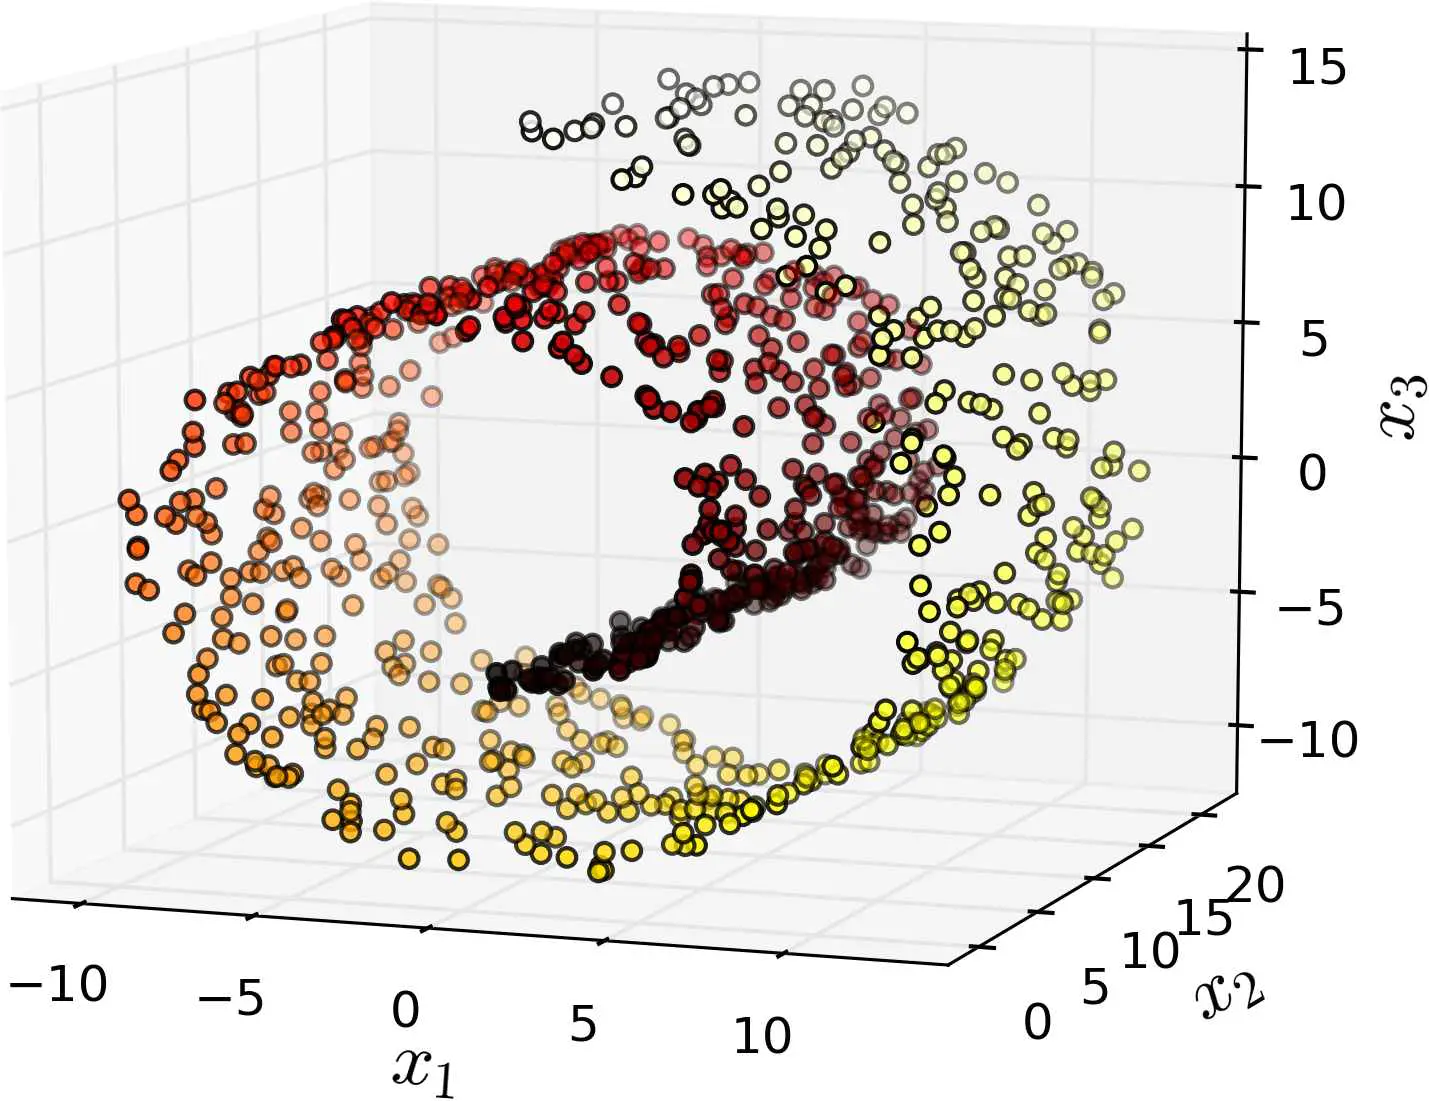

简单地将数据集投射到一个平面上（例如，直接丢弃x3）会将瑞士卷的不同层叠在一起，如图 8-5 左侧所示。但是，你真正想要的是展开瑞士卷所获取到的类似图 8-5 右侧的 2D 数据集。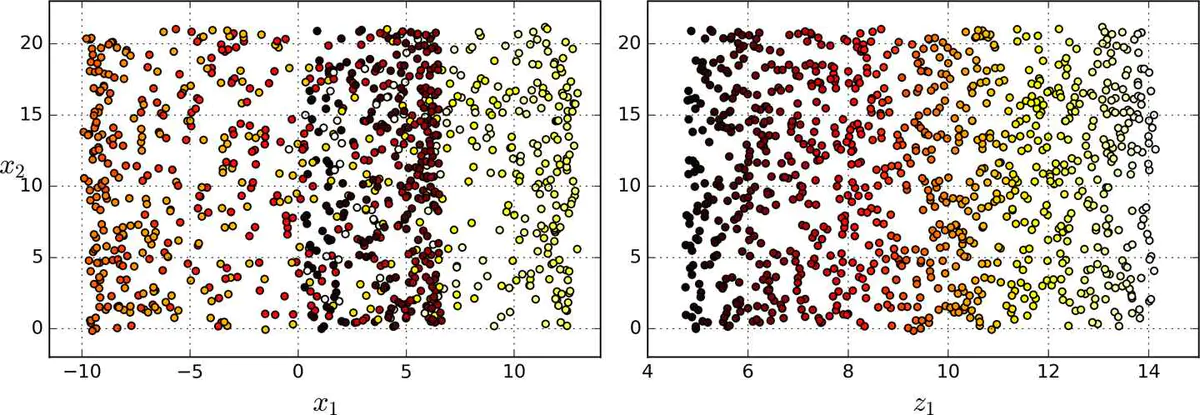

### 流形学习 
瑞士卷一个是二维流形的例子。简而言之，二维流形是一种二维形状，它可以在更高维空间中弯曲或扭曲。更一般地，一个d维流形是类似于d维超平面的n维空间（其中d < n）的一部分。在我们瑞士卷这个例子中，d = 2，n = 3：它有些像 2D 平面，但是它实际上是在第三维中卷曲。

许多降维算法通过对训练实例所在的流形进行建模从而达到降维目的；这叫做流形学习。它**依赖于流形猜想（manifold assumption），也被称为流形假设（manifold hypothesis），它认为大多数现实世界的高维数据集大都靠近一个更低维的流形。**这种假设经常在实践中被证实。

让我们再回到 MNIST 数据集：所有手写数字图像都有一些相似之处。它们由连线组成，边界是白色的，大多是在图片中中间的，等等。如果你随机生成图像，只有一小部分看起来像手写数字。换句话说，如果您尝试创建数字图像，那么您的自由度远低于您生成任何随便一个图像时的自由度。这些约束往往会将数据集压缩到较低维流形中。

流形假设通常包含着另一个隐含的假设：你现在的手上的工作（例如分类或回归）如果在流形的较低维空间中表示，那么它们会变得更简单。例如，在图 8-6 的第一行中，瑞士卷被分为两类：在三维空间中（图左上），分类边界会相当复杂，但在二维展开的流形空间中（图右上），分类边界是一条简单的直线。

但是，这个假设并不总是成立。例如，在图 8-6 的最下面一行，决策边界位于x1 = 5（图左下）。这个决策边界在原始三维空间（一个垂直平面）看起来非常简单，但在展开的流形中却变得更复杂了（四个独立线段的集合）（图右下）。

简而言之，如果在训练模型之前降低训练集的维数，那训练速度肯定会加快，但并不总是会得出更好的训练效果；这一切都取决于数据集。

希望你现在对于维数爆炸以及降维算法如何解决这个问题有了一定的理解，特别是对流形假设提出的内容。本章的其余部分将介绍一些最流行的降维算法。
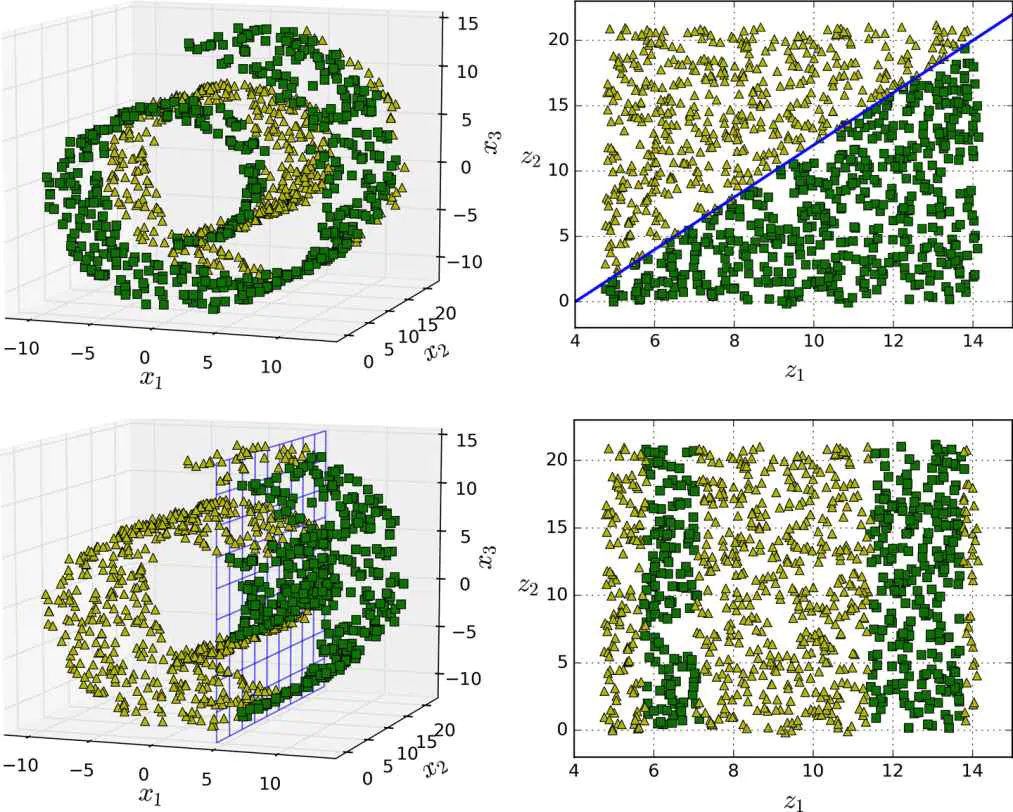

### 主成分分析（PCA）
主成分分析（Principal Component Analysis）是目前为止最流行的降维算法。首先它找到接近数据集分布的超平面，然后将所有的数据都投影到这个超平面上。<br>
#### 保留（最大）方差
在将训练集投影到较低维超平面之前，您首先需要选择正确的超平面。例如图 8-7 左侧是一个简单的二维数据集，以及三个不同的轴（即一维超平面）。图右边是将数据集投影到每个轴上的结果。正如你所看到的，投影到实线上保留了最大方差，而在点线上的投影只保留了非常小的方差，投影到虚线上保留的方差则处于上述两者之间。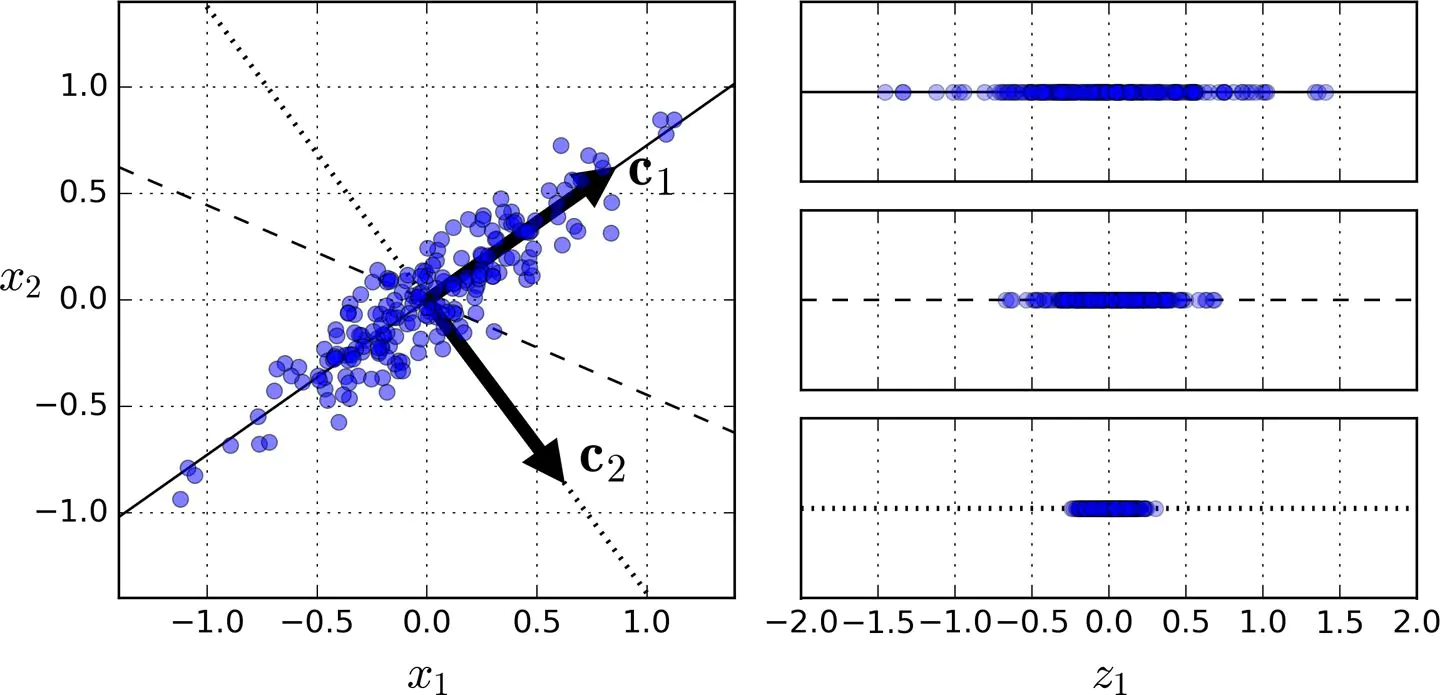

选择保持最大方差的轴看起来是合理的，因为它很可能比其他投影损失更少的信息。证明这种选择的另一种方法是，选择这个轴使得将原始数据集投影到该轴上的均方距离最小。这是就 PCA 背后的思想，相当简单。
#### 主成分（Principle Componets
PCA 寻找训练集中可获得最大方差的轴。在图 8-7 中，它是一条实线。它还发现了一个与第一个轴正交的第二个轴，选择它可以获得最大的残差。在这个 2D 例子中，没有选择：就只有这条点线。但如果在一个更高维的数据集中，PCA 也可以找到与前两个轴正交的第三个轴，以及与数据集中维数相同的第四个轴，第五个轴等。

定义第i个轴的单位矢量被称为第i个主成分（PC）。在图 8-7 中，第一个 PC 是c1，第二个 PC 是c2。在图 8-2 中，前两个 PC 用平面中的正交箭头表示，第三个 PC 与上述 PC 形成的平面正交（指向上或下）。<br>
**概述**： 主成分的方向不稳定：如果稍微打乱一下训练集并再次运行 PCA，则某些新 PC 可能会指向与原始 PC 方向相反。但是，它们通常仍位于同一轴线上。在某些情况下，一对 PC 甚至可能会旋转或交换，但它们定义的平面通常保持不变。
那么如何找到训练集的主成分呢？幸运的是，有一种称为**奇异值分解（SVD**）的标准矩阵分解技术，可以将训练集矩阵X分解为三个矩阵U·Σ·V^T的点积，其中V^T包含我们想要的所有主成分，如公式 8-1 所示。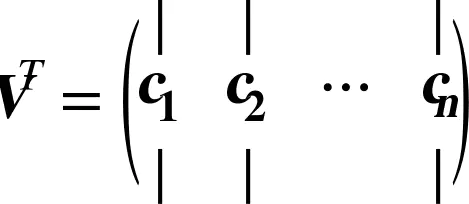


下面的 Python 代码使用了 Numpy 提供的svd()函数获得训练集的所有主成分，然后提取前两个 PC:
u大小为(M,M)，s大小为(M,N)，v大小为(N,N)

In [1]:
import os
import zipfile
from scipy.io import loadmat

mnist_zip_path = os.path.join(os.getcwd(), "mnist-original.zip")
mnist_mat_path = os.path.join(os.getcwd(), "mnist-original.mat")
mnistzip = zipfile.ZipFile(mnist_zip_path, "r") 
if not os.path.exists(mnist_mat_path):
    mnistzip.extractall()
mnistzip.close()
mnist = loadmat(mnist_mat_path)
X, y = mnist["data"].T, mnist["label"].T

In [8]:
import numpy as np
# a =np.random.randint(5, size=(10,10))
# b =np.random.randint(5,10, size=(90,10))
# X= np.mat(np.r_[a,b])
X_centered=X-X.mean(axis=0)
U,s,V=np.linalg.svd(X_centered[:30000])
c1=V.T[:,0]
c2=V.T[:,1]

#### 投影到d维空间
一旦确定了所有的主成分，你就可以通过将数据集投影到由前d个主成分构成的超平面上，从而将数据集的维数降至d维。选择这个超平面可以确保投影将保留尽可能多的方差。例如，在图 8-2 中，3D 数据集被投影到由前两个主成分定义的 2D 平面，保留了大部分数据集的方差。因此，2D 投影看起来非常像原始 3D 数据集。

为了将训练集投影到超平面上，可以简单地通过计算训练集矩阵X和Wd的点积，Wd定义为包含前d个主成分的矩阵（即由V^T的前d列组成的矩阵），如公式 8-2 所示。

公式 8-2 将训练集投影到d维空间

下面的 Python 代码将训练集投影到由前两个主成分定义的超平面上：

In [185]:
W2=V.T[:,:2]
X2D=X_centered.dot(W2)
X2D[:5]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

#### 使用 Scikit-Learn
Scikit-Learn 的 PCA 类使用 SVD 分解来实现，就像我们之前做的那样。以下代码应用 PCA 将数据集的维度降至两维（请注意，它会自动处理数据的中心化）：

In [3]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X2D=pca.fit_transform(X)
X2D[:5]

array([[1010.49800146, -289.94439026],
       [1033.56293509, -351.16562504],
       [ 615.42715868, -244.22868016],
       [ 942.22572893, -245.36857565],
       [1645.83504935,  -80.69035988]])

将 PCA 转化器应用于数据集后，可以使用components_访问每一个主成分（注意，它返回以 PC 作为水平向量的矩阵，因此，如果我们想要获得第一个主成分则可以写成pca.components_.T[:,0]）。

#### 方差解释率（Explained Variance Ratio）
另一个非常有用的信息是每个主成分的方差解释率，可通过explained_variance_ratio_变量获得。它表示位于每个主成分轴上的数据集方差的比例。例如，让我们看一下图 8-2 中表示的三维数据集前两个分量的方差解释率：


In [191]:
print(pca.explained_variance_ratio_)

[0.09746116 0.07155445]


#### 选择正确的维度
通常我们倾向于选择加起来到方差解释率能够达到足够占比（例如 95%）的维度的数量，而不是任意选择要降低到的维度数量。当然，除非您正在为数据可视化而降低维度 -- 在这种情况下，您通常希望将维度降低到 2 或 3。

下面的代码在不降维的情况下进行 PCA，然后计算出保留训练集方差 95% 所需的最小维数：

In [192]:
pca=PCA()
pca.fit(X)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
d

154

你可以设置n_components = d并再次运行 PCA。但是，有一个更好的选择：不指定你想要保留的主成分个数，而是将n_components设置为 0.0 到 1.0 之间的浮点数，表明您希望保留的方差比率：

In [194]:
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X)
X_reduced.shape

(70000, 154)

#### PCA 压缩
显然，在降维之后，训练集占用的空间要少得多。例如，尝试将 PCA 应用于 MNIST 数据集，同时保留 95% 的方差。你应该发现每个实例只有 150 多个特征，而不是原来的 784 个特征。因此，尽管大部分方差都保留下来，但数据集现在还不到其原始大小的 20%！这是一个合理的压缩比率，您可以看到这可以如何极大地加快分类算法（如 SVM 分类器）的速度。

通过应用 PCA 投影的逆变换，也可以将缩小的数据集解压缩回 784 维。当然这并不会返回给你最原始的数据，因为投影丢失了一些信息（在5％的方差内），但它可能非常接近原始数据。原始数据和重构数据之间的均方距离（压缩然后解压缩）被称为重构误差（reconstruction error）。例如，下面的代码将 MNIST 数据集压缩到 154 维，然后使用inverse_transform()方法将其解压缩回 784 维。图 8-9 显示了原始训练集（左侧）的几个数字在压缩并解压缩后（右侧）的对应数字。您可以看到有轻微的图像质量降低，但数字仍然大部分完好无损。


In [199]:
pca=PCA(n_components=154)
X_mnist_reduced=pca.fit_transform(X)
X_mnist_recovered=pca.inverse_transform(X_mnist_reduced)

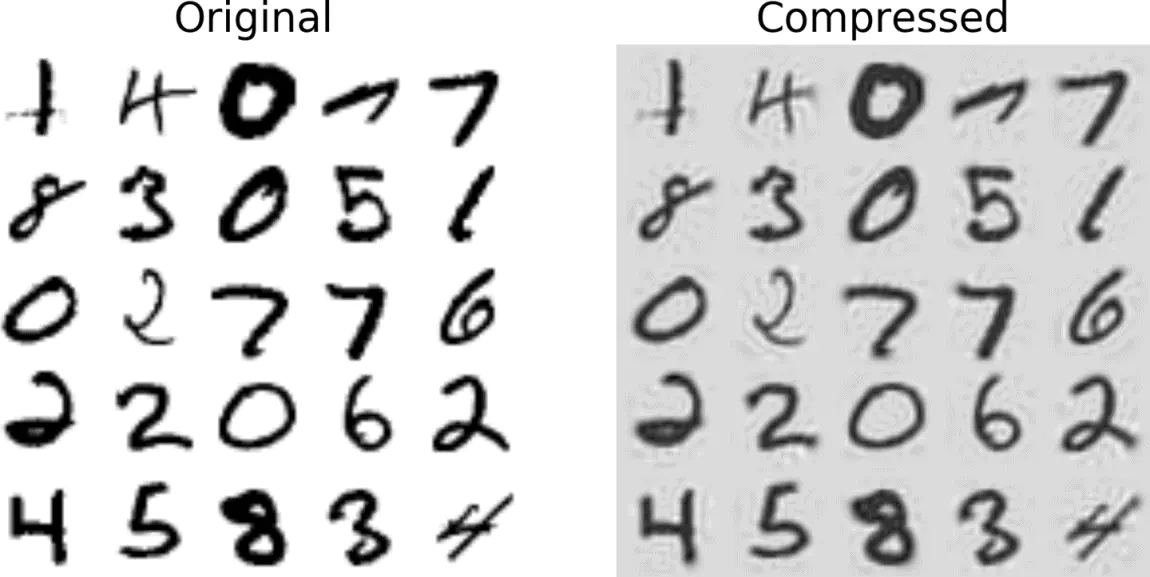

逆变换的公式如公式 8-3 所示

公式 8-3 PCA逆变换，回退到原来的数据维度


#### 增量 PCA（Incremental PCA）
先前 PCA 实现的一个问题是它需要在内存中处理整个训练集以便 SVD 算法运行。幸运的是，我们已经开发了增量 PCA（IPCA）算法：您可以将训练集分批，并一次只对一个批量使用 IPCA 算法。这对大型训练集非常有用，并且可以在线应用 PCA（即在新实例到达时即时运行）。

下面的代码将 MNIST 数据集分成 100 个小批量（使用 NumPy 的array_split()函数），并将它们提供给 Scikit-Learn 的IncrementalPCA类，以将 MNIST 数据集的维度降低到 154 维（就像以前一样）。请注意，您必须对每个最小批次调用partial_fit()方法，而不是对整个训练集使用fit()方法：


In [206]:
from sklearn.decomposition import IncrementalPCA

n_batches=100
inc_pca=IncrementalPCA(n_components=154)
for X_batch in np.array_split(X,n_batches):
    inc_pca.partial_fit(X_batch)
X_mnist_reduced=inc_pca.transform(X)
X_mnist_reduced.shape

(70000, 154)

#### 随机 PCA（Randomized PCA）
Scikit-Learn 提供了另一种执行 PCA 的选择，称为随机 PCA。这是一种随机算法，可以快速找到前d个主成分的近似值。它的计算复杂度是O(m × d^2) + O(d^3)，而不是O(m × n^2) + O(n^3)，所以当d远小于n时，它比之前的算法快得多。

In [4]:
rnd_pca=PCA(n_components=154,svd_solver='randomized')
X_reduced=rnd_pca.fit_transform(X[:2000])

### 内核PCA
在第5章中，我们讨论了内核技巧，这是一种隐式的数学技术
将实例映射到一个高维空间（称为特征空间），从而启用
支持向量机进行非线性分类和回归。 回想一下
高维特征空间中的线性决策边界对应于
原始空间中的复杂非线性决策边界。
事实证明，可以将相同的技巧应用于PCA，从而可以执行
用于降维的复杂非线性投影。 这叫做内核
PCA（kPCA）.6通常擅长在投影后保留实例簇，或者
有时甚至展开接近扭曲流形的数据集。
例如，以下代码使用Scikit-Learn的KernelPCA类执行kPCA
使用RBF内核（有关RBF内核和
其他内核）：

In [6]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X[:2000])

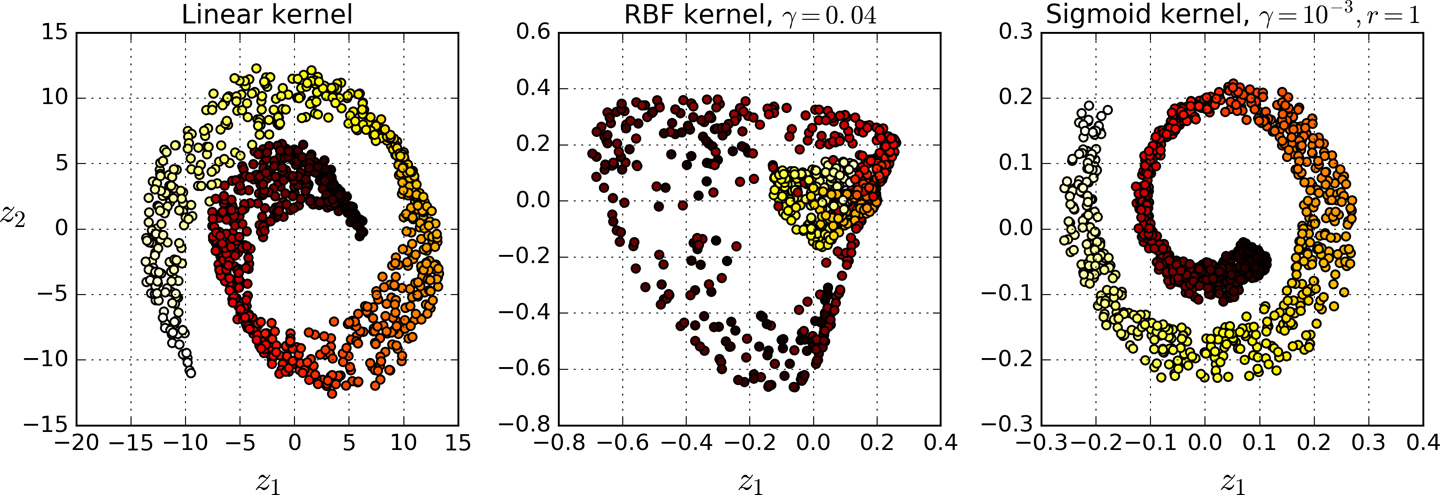

**选择内核并调整超参数**
由于kPCA是一种无监督的学习算法，因此没有明显的性能
测量以帮助您选择最佳内核和超参数值。 然而，
降维通常是有监督学习任务的准备步骤
（例如分类），因此您只需使用网格搜索即可选择内核和超参数
从而在该任务上获得最佳性能。 例如，以下
代码创建了两步流水线，首先将维数减少到二维
使用kPCA，然后应用Logistic回归进行分类。 然后使用网格
SearchCV为kPCA找到最佳内核和伽马值，以便获得最佳
管道末端的分类精度：

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([
            ("kpca", KernelPCA(n_components=2)),
            ("log_reg", LogisticRegression())
            ])
param_grid = [{
"kpca__gamma": np.linspace(0.03, 0.05, 10),
"kpca__kernel": ["rbf", "sigmoid"]
}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)
print(grid_search.best_params_)

这次完全不受监督的另一种方法是选择内核和超参数
产生最低的重建误差。但是，重建不是
与线性PCA一样容易。这就是为什么。图8-11显示了原始的瑞士卷3D
数据集（左上），以及使用RBF应用kPCA之后得到的2D数据集
内核（右上方）。多亏了内核技巧，这在数学上等同于
将训练集映射到无限维特征空间（右下）
使用特征图φ，然后将转换后的训练集投影到2D
使用线性PCA。注意，如果我们可以反转给定的线性PCA步骤
缩小空间中的实例，重建点将位于要素空间中，而不是
在原始空间中（例如，在图中以x表示）。自从
特征空间是无限维的，我们无法计算重构点，
因此我们无法计算出真正的重建误差。幸运的是，有可能
在原始空间中找到一个点，该点将映射到重建的点附近
点。这称为重建原像。一旦有了这个原像，您就可以
可以测量其到原始实例的平方距离。然后可以选择内核
以及使该重构前图像误差最小的超参数。

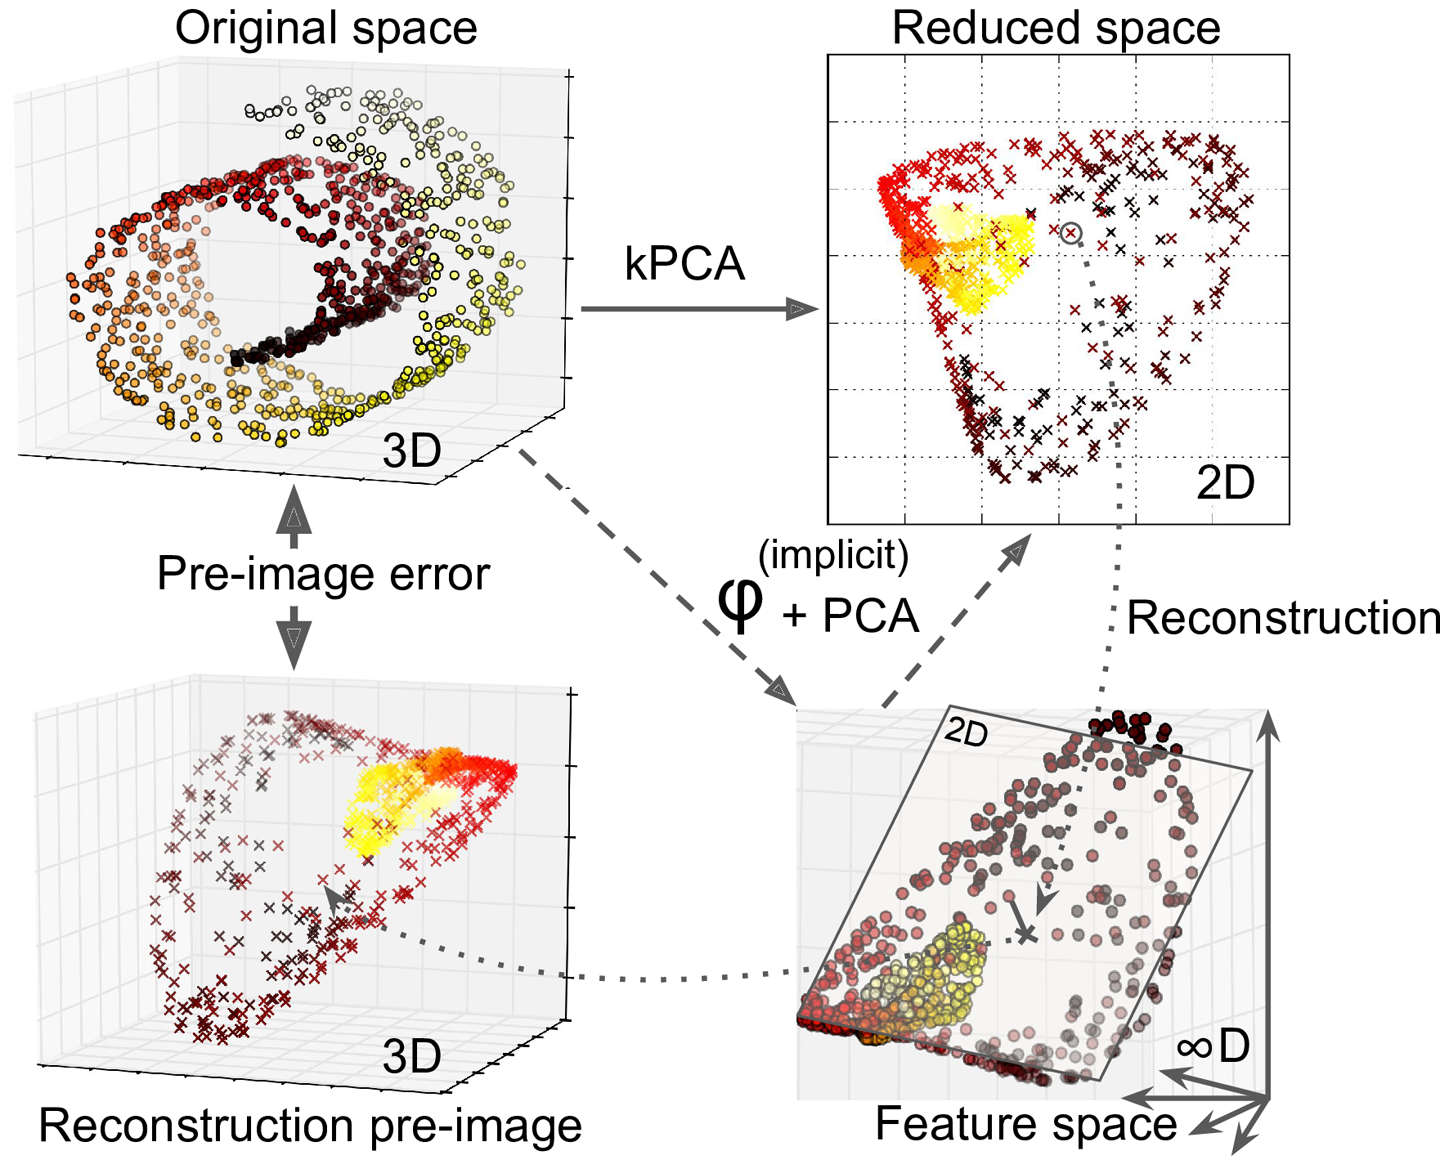

你可能想知道如何执行此重构。 一种解决方案是训练
有监督的回归模型，将预测的实例作为训练集，
原始实例作为目标。 如果您进行设置，Scikit-Learn将自动执行此操作
fit_inverse_transform = True，如以下代码所示：

In [12]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X[:2000])
X_preimage = rbf_pca.inverse_transform(X_reduced)

默认情况下，fit_inverse_transform = False并且KernelPCA没有
inverse_transform（）方法。 仅创建此方法
当您设置fit_inverse_transform = True时。
然后，您可以计算重建前图像误差：

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X[:2000], X_preimage)

4.438891352529611e-24

### 局部线性嵌入
（LLE）是另一个非常强大的非线性维度
还原（NLDR）技术。这是一种不依赖于流形学习的技术
像以前的算法一样进行投影。简而言之，LLE通过首先测量
每个训练实例如何与其最近的邻居线性关联（c.n.），然后
寻找这些地方的训练集的低维表示
关系得到最好的保存（稍后会详细介绍）。这使得它特别
擅长展开扭曲的歧管，尤其是在没有太多噪音的情况下。
例如，以下代码使用Scikit-Learn的LocallyLinearEmbedding类来
展开瑞士卷。生成的2D数据集如图8-12所示。尽你所能
看到，瑞士卷已完全展开，并且实例之间的距离为
当地保存完好。但是，距离不会更大范围地保留：左侧
展开的瑞士卷的一部分被挤压，而右侧部分被拉伸。不过，
LLE在流形建模方面做得很好

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X[:2000])

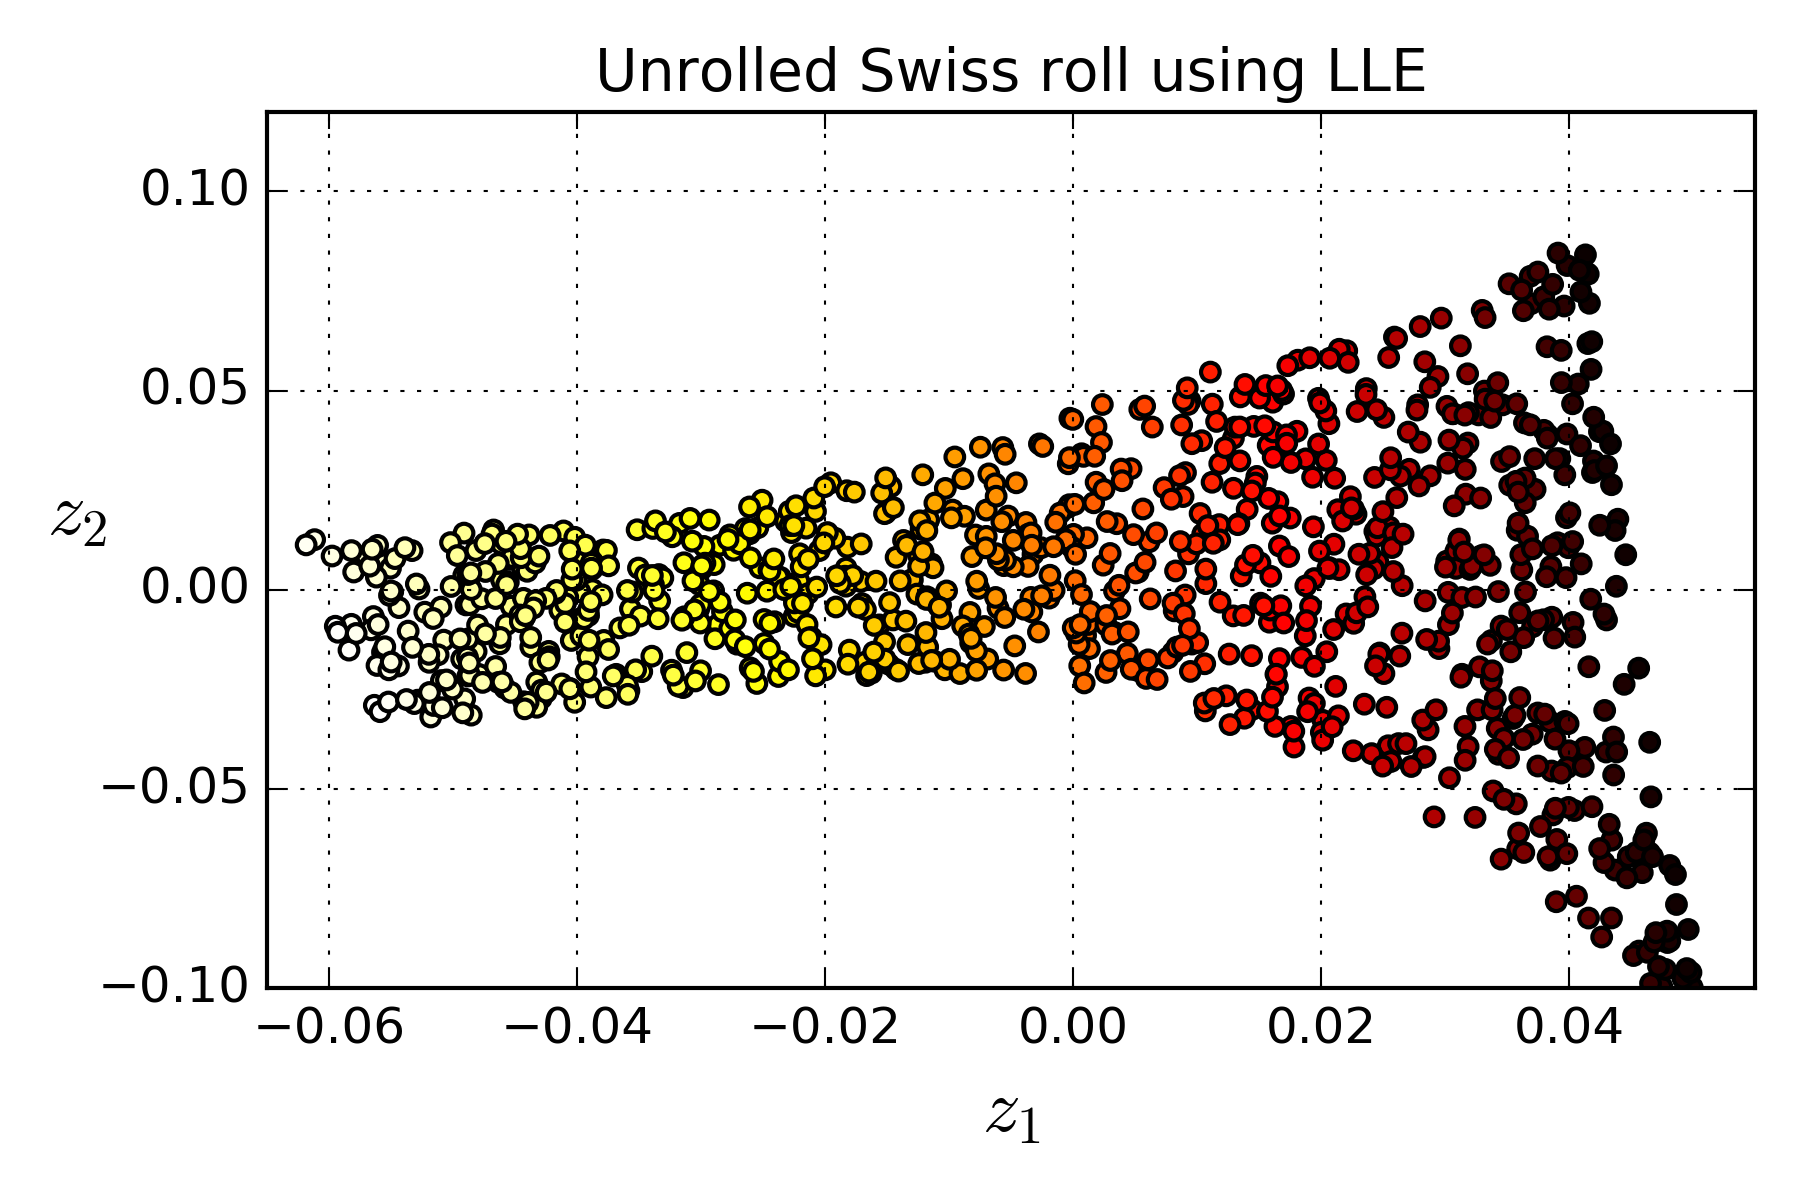

### 其他降维技术
还有许多其他降维技术，其中一些是
可在Scikit-Learn中获得。以下是一些最受欢迎的内容：<br>
**多维缩放（MDS）**在尝试保持实例之间距离的同时降低了维度（参见图 8-13）<br>
**Isomap** 通过将每个实例连接到最近的邻居来创建图形，然后在尝试保持实例之间的测地距离时降低维度。<br>
**t-分布随机邻域嵌入**（t-Distributed Stochastic Neighbor Embedding，t-SNE）可以用于降低维​​度，同时试图保持相似的实例临近并将不相似的实例分开。它主要用于可视化，尤其是用于可视化高维空间中的实例（例如，可以将MNIST图像降维到 2D 可视化。<br>
**线性判别分析**（Linear Discriminant Analysis，LDA）实际上是一种分类算法，但在训练过程中，它会学习类之间最有区别的轴，然后使用这些轴来定义用于投影数据的超平面。LDA 的好处是投影会尽可能地保持各个类之间距离，所以在运行另一种分类算法（如 SVM 分类器）之前，LDA 是很好的降维技术。


作者：SeanCheney
链接：https://www.jianshu.com/p/22de1a9f800a
来源：简书
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。
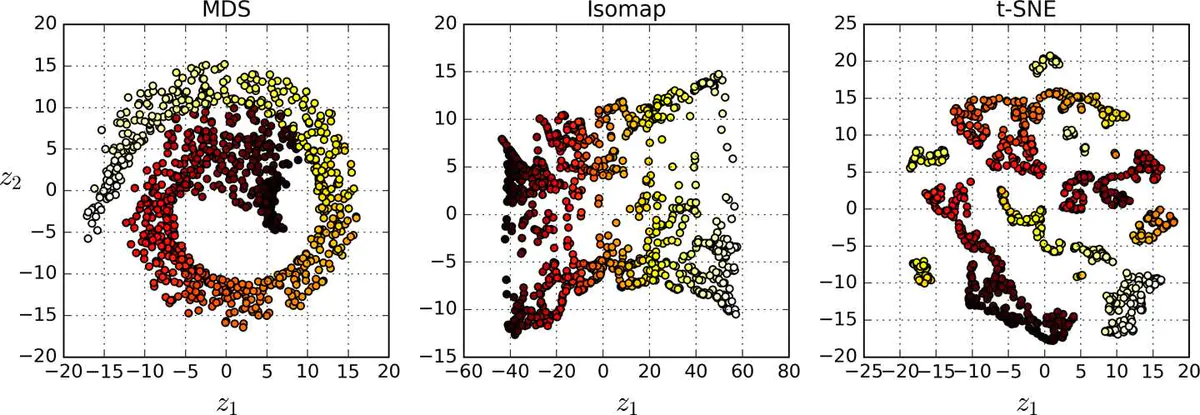